In [1]:
import pandas as pd  
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t")  

FileNotFoundError: [Errno 2] No such file or directory: 'Restaurant_Reviews.tsv'

In [3]:
import os
print(os.getcwd())

C:\Users\roop1


In [7]:
import pandas as pd
df = pd.read_csv("roop1/Restaurant_Reviews.tsv", delimiter="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'roop1/Restaurant_Reviews.tsv'

In [9]:
import pandas as pd
df = pd.read_csv("roop1/Restaurant_Reviews.tsv", delimiter="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'roop1/Restaurant_Reviews.tsv'

In [15]:
import pandas as pd
df = pd.read_csv(r"C:\Users\roop1\OneDrive\Desktop\Restaurant_Reviews.tsv", delimiter="\t")


In [17]:
!pip install nltk

In [19]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required resources
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roop1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roop1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\roop1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
df.info()  # Check column names and data types
print(df.head())  # Preview first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [23]:
# Initialize stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z]", " ", text)
    # Tokenize words
    words = text.split()
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return " ".join(words)

# Apply cleaning to the 'Review' column
df["Cleaned_Review"] = df["Review"].apply(clean_text)


In [25]:
df[["Review", "Cleaned_Review"]].head(10)  # Compare original vs cleaned reviews


,Review,Cleaned_Review
0,Wow... Loved this place.,wow love place
1,Crust is not good.,crust good
2,Not tasty and the texture was just nasty.,tasti textur nasti
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,select menu great price
5,Now I am getting angry and I want my damn pho.,get angri want damn pho
6,Honeslty it didn't taste THAT fresh.),honeslti tast fresh
7,The potatoes were like rubber and you could te...,potato like rubber could tell made ahead time ...
8,The fries were great too.,fri great
9,A great touch.,great touch


In [27]:
!pip install wordcloud matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt


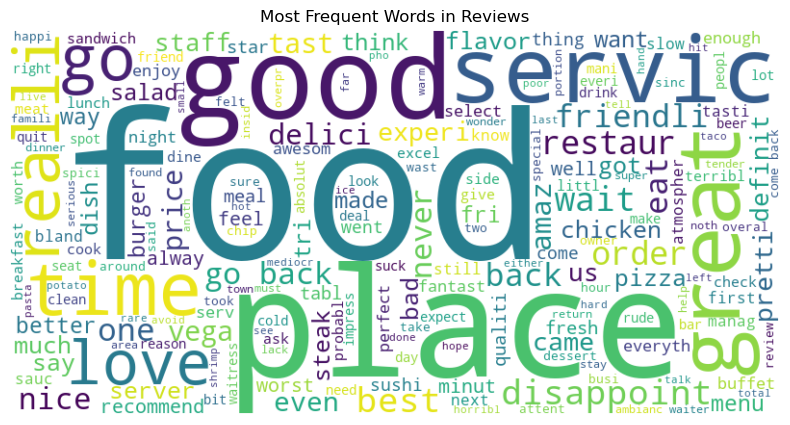

In [29]:
all_words = " ".join(df["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()


In [31]:
import nltk
from nltk import FreqDist
from nltk.util import ngrams


In [33]:
bigrams = [b for review in df["Cleaned_Review"] for b in list(ngrams(review.split(), 2))]
bigram_freq = FreqDist(bigrams)

bigram_df = pd.DataFrame(bigram_freq.most_common(10), columns=["Bigram", "Count"])
bigram_df["Bigram"] = bigram_df["Bigram"].apply(lambda x: " ".join(x))


C:\Users\roop1\AppData\Local\Temp\ipykernel_4384\3622410093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Bigram", data=bigram_df, palette="viridis")


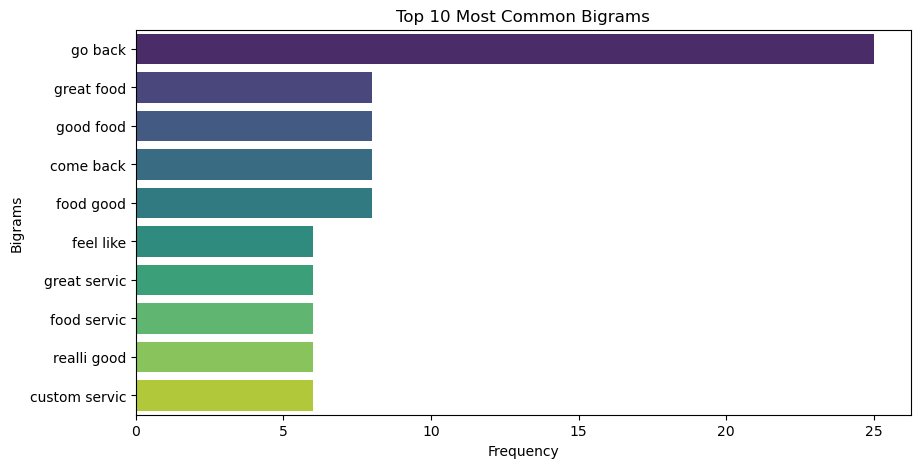

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Bigram", data=bigram_df, palette="viridis")
plt.title("Top 10 Most Common Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()


In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=20, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="dashed")  # Neutral sentiment line
plt.show()


KeyError: 'Sentiment'

<Figure size 800x500 with 0 Axes>

In [39]:
print(df.columns)


Index(['Review', 'Liked', 'Cleaned_Review'], dtype='object')


In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df["Sentiment"] = df["Cleaned_Review"].apply(lambda x: sia.polarity_scores(x)['compound'])


In [43]:
print(df[["Cleaned_Review", "Sentiment"]].head(10))


                                      Cleaned_Review  Sentiment
0                                     wow love place     0.8402
1                                         crust good     0.4404
2                                 tasti textur nasti     0.0000
3  stop late may bank holiday rick steve recommen...     0.8020
4                            select menu great price     0.6249
5                            get angri want damn pho    -0.3400
6                                honeslti tast fresh     0.3182
7  potato like rubber could tell made ahead time ...     0.5719
8                                          fri great     0.6249
9                                        great touch     0.6249


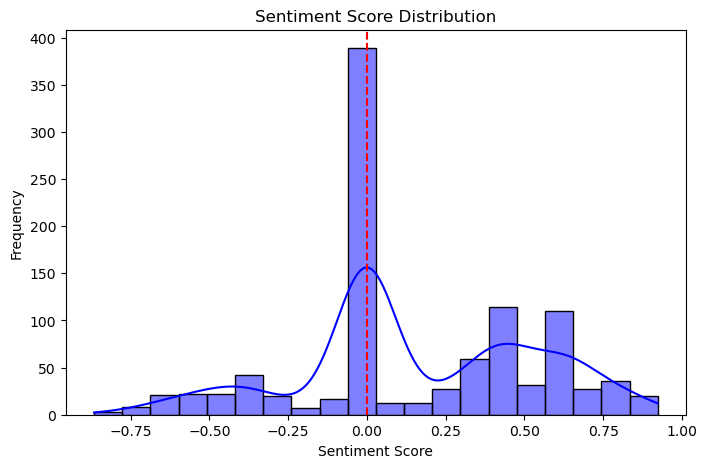

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=20, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, color="red", linestyle="dashed")  # Neutral sentiment line
plt.show()


In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment_Label"], palette=["red", "blue", "green"])
plt.title("Sentiment Category Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


KeyError: 'Sentiment_Label'

<Figure size 600x400 with 0 Axes>

C:\Users\roop1\AppData\Local\Temp\ipykernel_4384\1533946788.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment_Label"], palette=["red", "blue", "green"])


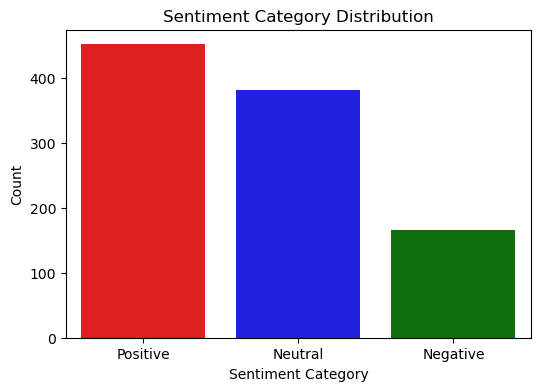

In [49]:
# Define sentiment categories
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply function to create a new column
df["Sentiment_Label"] = df["Sentiment"].apply(categorize_sentiment)

# Now try plotting again
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment_Label"], palette=["red", "blue", "green"])
plt.title("Sentiment Category Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


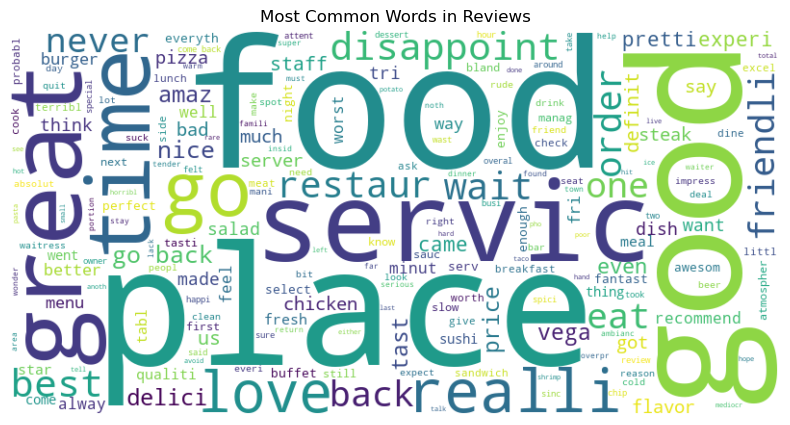

In [51]:
from wordcloud import WordCloud

text = " ".join(review for review in df["Cleaned_Review"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


In [53]:
from collections import Counter
import nltk
from nltk.util import ngrams

# Tokenize and generate bigrams
df["Tokenized"] = df["Cleaned_Review"].apply(lambda x: x.split())
bigrams = [bigram for review in df["Tokenized"] for bigram in ngrams(review, 2)]

# Count top 10 bigrams
bigram_freq = Counter(bigrams).most_common(10)
bigram_freq


[(('go', 'back'), 25),
 (('great', 'food'), 8),
 (('good', 'food'), 8),
 (('come', 'back'), 8),
 (('food', 'good'), 8),
 (('feel', 'like'), 6),
 (('great', 'servic'), 6),
 (('food', 'servic'), 6),
 (('realli', 'good'), 6),
 (('custom', 'servic'), 6)]

In [55]:
!pip install scikit-learn textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00


In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob


In [59]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # Unigrams & bigrams, limit to 5000 features
X_tfidf = tfidf.fit_transform(df['cleaned_reviews'])


KeyError: 'cleaned_reviews'

In [61]:
print(df.columns)


Index(['Review', 'Liked', 'Cleaned_Review', 'Sentiment', 'Sentiment_Label',
       'Tokenized'],
      dtype='object')


In [63]:
X_tfidf = tfidf.fit_transform(df['Cleaned_Review'])  # Use 'Cleaned_Review' instead


In [65]:
df['review_length'] = df['Cleaned_Review'].apply(lambda x: len(x.split()))  # Word count
df['sentiment_score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Sentiment


In [67]:
from scipy.sparse import hstack

X_final = hstack((X_tfidf, np.array(df[['review_length', 'sentiment_score']])))  # Merge features

# Convert to array (if needed for modeling)
X_final = X_final.toarray()
